# Análise Exploratória De Dados: Menu Nutrition Dataset

Caderno de **Portifolio** <br/>
[Marcos Vinicius](https://www.linkedin.com/in/marcosvmanjos/) - [Github](https://github.com/marcos-anjos)

**Data From**: [Kaggle | Menu Nutrition Dataset](https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts)

---

**Importar as bibliotecas necessárias**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Visualização do DataFrame
data = pd.read_csv('India_Menu.csv') 

**1. Descrição dos dados**

In [3]:
# Lista dos tipos de dados de cada coluna no conjunto de dados
data.dtypes 

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [4]:
# Visualizar as primeiras 5 linhas do conjunto de dados
data.head() 

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [5]:
# Obter as dimensões do conjunto de dados
data.shape 

(141, 13)

In [6]:
# Obter uma visão geral das informações sobre o conjunto de dados
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [7]:
# O conjunto de dados contém 141 itens de menu para análise nutricional.
# Três características são categóricas: Categoria do menu, Itens do menu e Tamanho por dose. As demais características são numéricas.
# Um dado está faltando em relação ao sódio.

---

**2. Limpeza dos Dados**

In [8]:
# Calcular o número de valores nulos em cada coluna do conjunto de dados
data.isnull().sum() 

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [9]:
# Manter a integridade dos dados sem introduzir grandes distorções nos resultados finais da análise
data['Sodium (mg)'].fillna(data['Sodium (mg)'].mean(), inplace=True) 

In [10]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [11]:
# Verificar valores duplicados em todo o DataFrame
valores_duplicados = data.duplicated().sum() 
print("Total de valores duplicados em todo o DataFrame:", valores_duplicados)

Total de valores duplicados em todo o DataFrame: 0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [13]:
# Preenchemos um valor nulo na coluna "Sodium (mg)" usando a média dos valores não nulos dessa coluna.
# Após a correção, não encontramos valores duplicados em todo o conjunto de dados.

---

**3. Análise Exploratória de Dados**

In [14]:
data.groupby('Menu Category').count()[['Menu Items']] #  agrupa os dados por categoria de menu e conta o número de itens em cada categoria. 

,Menu Items
Menu Category,
Beverages Menu,17
Breakfast Menu,15
Condiments Menu,9
Desserts Menu,2
Gourmet Menu,11
McCafe Menu,51
Regular Menu,36


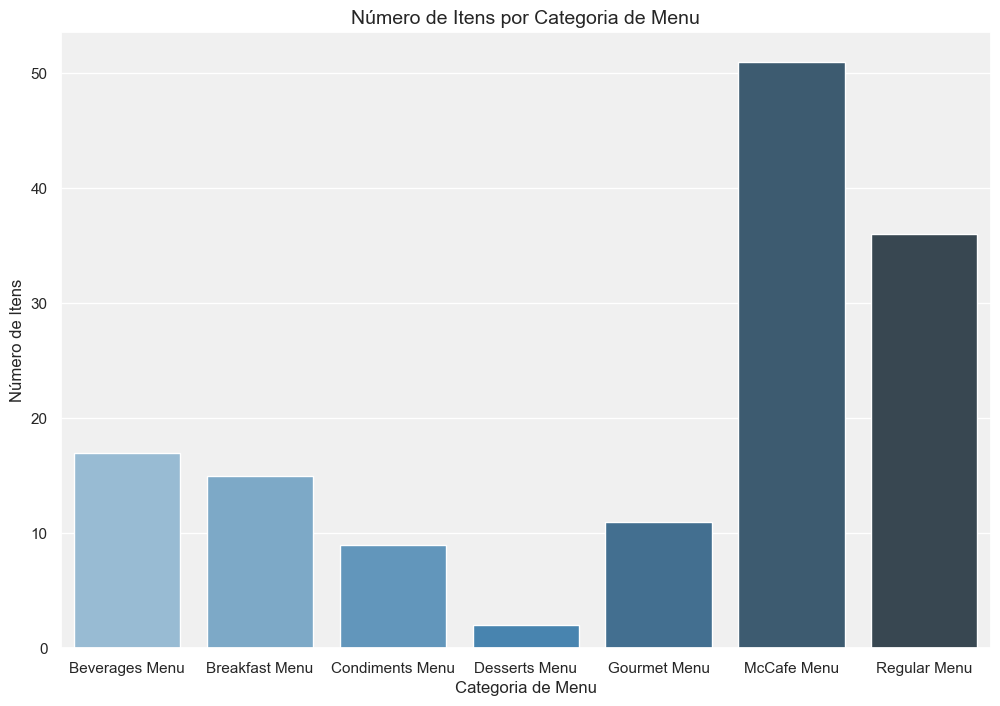

In [61]:
menu_counts = data.groupby('Menu Category').count()[['Menu Items']]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=menu_counts.index, y='Menu Items', data=menu_counts, palette='Blues_d')
ax.set_facecolor('#f0f0f0')  

plt.xlabel('Categoria de Menu', fontsize=12)
plt.ylabel('Número de Itens', fontsize=12)

plt.title('Número de Itens por Categoria de Menu', fontsize=14)

plt.show()

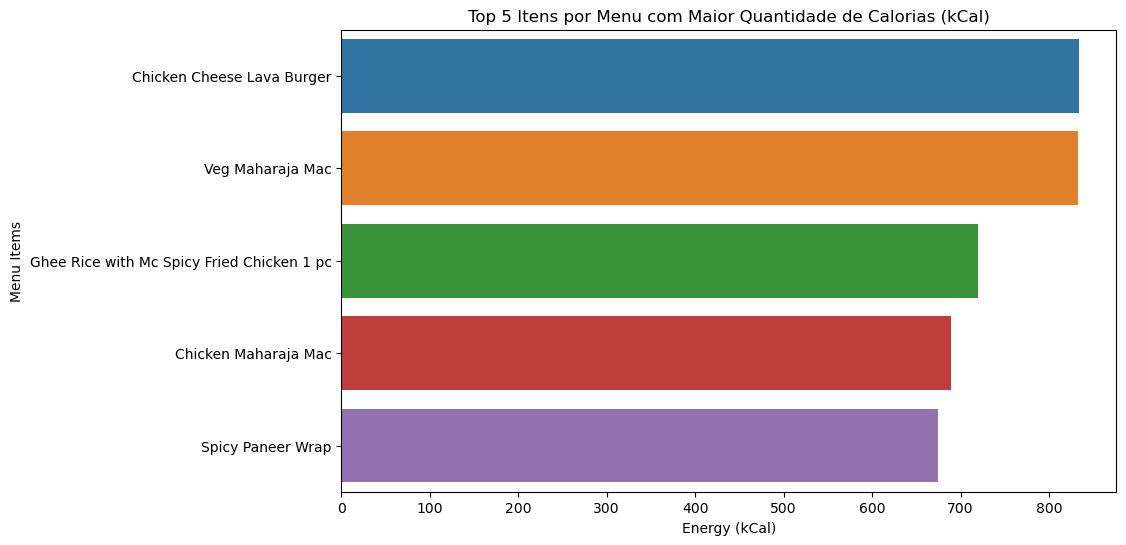

In [31]:
def encontrar_maiores_itens_kCal(data, n=5):
    # Ordenar os dados pela quantidade de calorias em ordem decrescente
    data_ordenados_por_kCal = data.sort_values(by='Energy (kCal)', ascending=False)
    
    # Selecionar os top N itens
    top_n_itens = data_ordenados_por_kCal.head(n)
    
    return top_n_itens[['Menu Items', 'Energy (kCal)']]

# Usando a função para encontrar os 5 itens com mais calorias
cinco_maiores_itens_kCal = encontrar_maiores_itens_kCal(data)

# Visualizando os dados em um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Energy (kCal)', y='Menu Items', data=cinco_maiores_itens_kCal, errorbar=None)
plt.xlabel('Energy (kCal)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Calorias (kCal)')
plt.show()

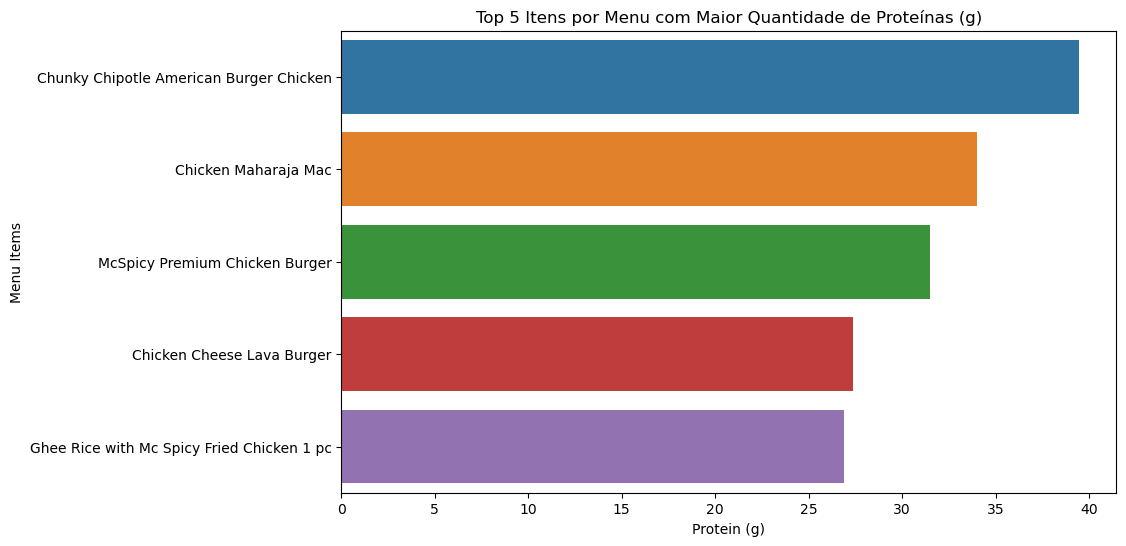

In [32]:
def encontrar_maiores_itens_proteina(data, n=5):

    data_ordenados_por_proteina = data.sort_values(by='Protein (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_proteina.head(n)
    
    return top_n_itens[['Menu Items', 'Protein (g)']]

cinco_maiores_itens_proteina = encontrar_maiores_itens_proteina(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Protein (g)', y='Menu Items', data=cinco_maiores_itens_proteina, errorbar=None)
plt.xlabel('Protein (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Proteínas (g)')
plt.show()

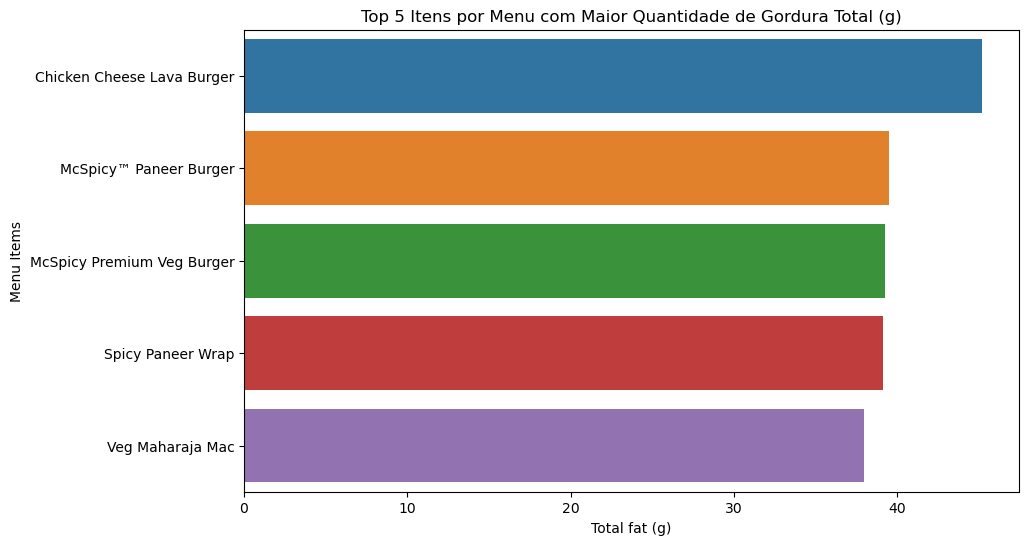

In [33]:
def encontrar_maiores_itens_total_fat(data, n=5):

    data_ordenados_por_total_fat = data.sort_values(by='Total fat (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_total_fat.head(n)
    
    return top_n_itens[['Menu Items', 'Total fat (g)']]

cinco_maiores_itens_total_fat = encontrar_maiores_itens_total_fat(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total fat (g)', y='Menu Items', data=cinco_maiores_itens_total_fat, errorbar=None)
plt.xlabel('Total fat (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Gordura Total (g)')
plt.show()

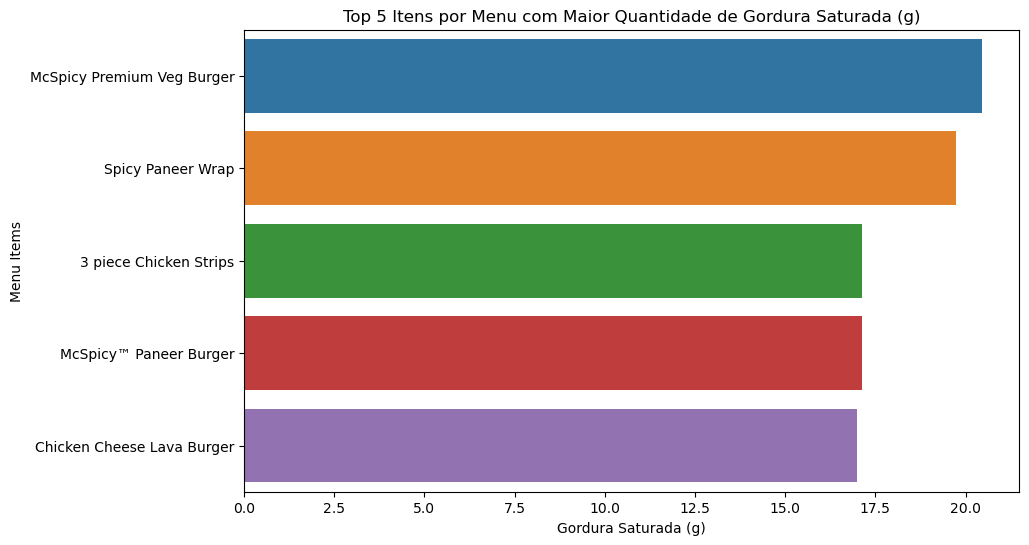

In [34]:
def encontrar_maiores_itens_gordura_saturada(data, n=5):
    
    data_ordenados_por_gordura_saturada = data.sort_values(by='Sat Fat (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_gordura_saturada.head(n)
    
    return top_n_itens[['Menu Items', 'Sat Fat (g)']]

cinco_maiores_itens_gordura_saturada = encontrar_maiores_itens_gordura_saturada(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sat Fat (g)', y='Menu Items', data=cinco_maiores_itens_gordura_saturada, errorbar=None)
plt.xlabel('Gordura Saturada (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Gordura Saturada (g)')
plt.show()

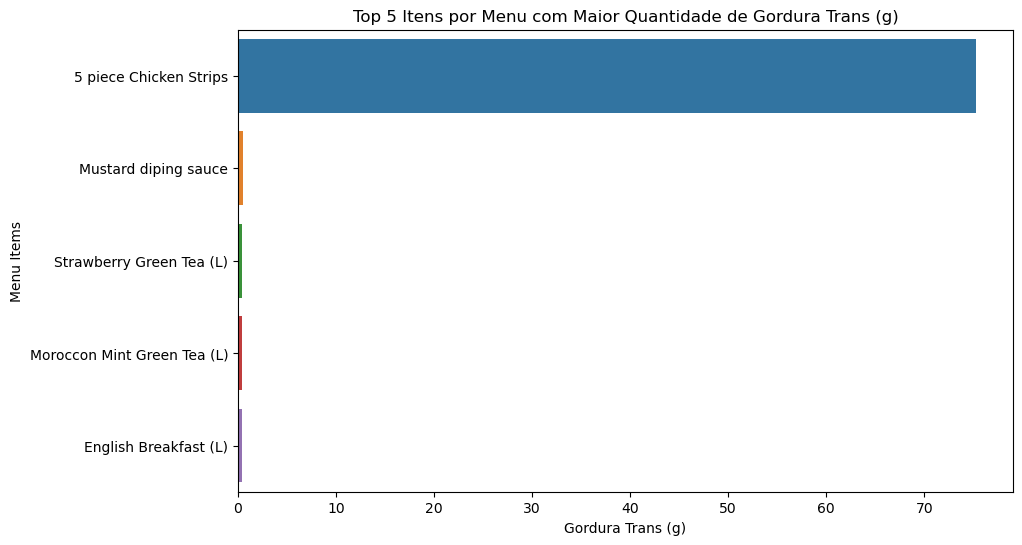

In [35]:
def encontrar_maiores_itens_trans_fat(data, n=5):

    data_ordenados_por_trans_fat = data.sort_values(by='Trans fat (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_trans_fat.head(n)
    
    return top_n_itens[['Menu Items', 'Trans fat (g)']]

cinco_maiores_itens_trans_fat = encontrar_maiores_itens_trans_fat(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trans fat (g)', y='Menu Items', data=cinco_maiores_itens_trans_fat, errorbar=None)
plt.xlabel('Gordura Trans (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Gordura Trans (g)')
plt.show()


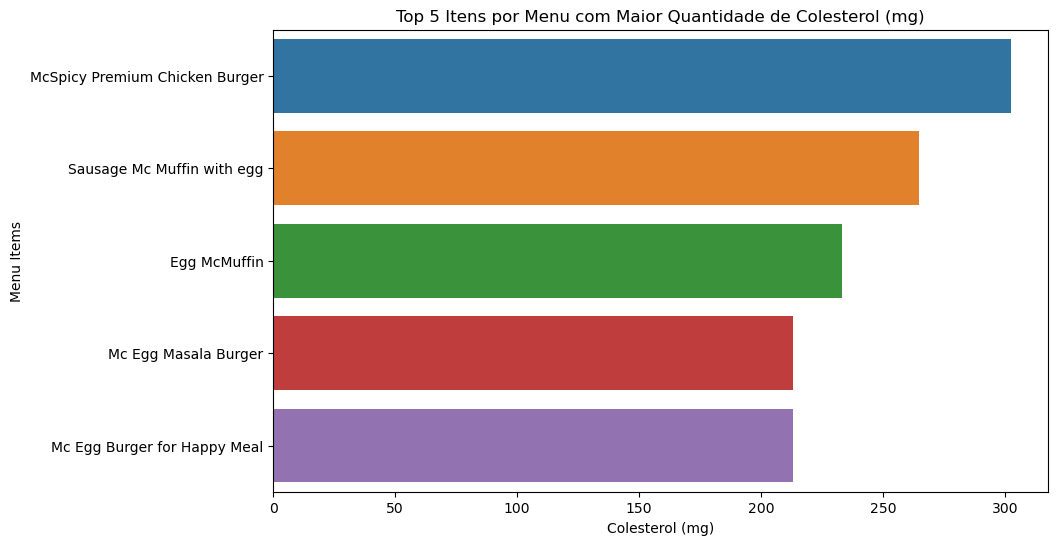

In [36]:
def encontrar_maiores_itens_colesterol(data, n=5):

    data_ordenados_por_colesterol = data.sort_values(by='Cholesterols (mg)', ascending=False)
    
    top_n_itens = data_ordenados_por_colesterol.head(n)
    
    return top_n_itens[['Menu Items', 'Cholesterols (mg)']]

cinco_maiores_itens_colesterol = encontrar_maiores_itens_colesterol(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cholesterols (mg)', y='Menu Items', data=cinco_maiores_itens_colesterol, errorbar=None)
plt.xlabel('Colesterol (mg)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Colesterol (mg)')
plt.show()


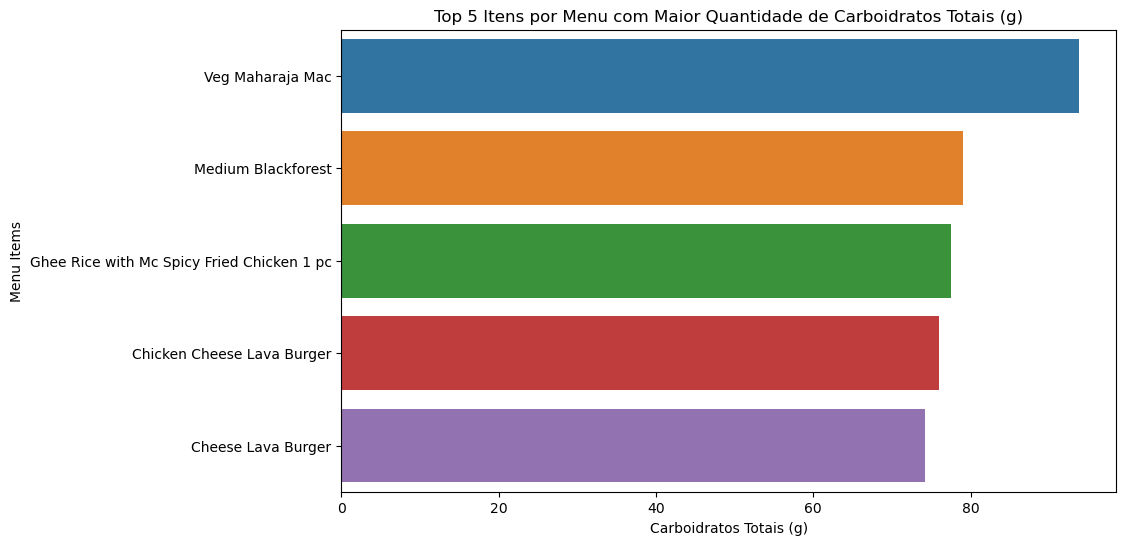

In [30]:
def encontrar_maiores_itens_carboidratos(data, n=5):
 
    data_ordenados_por_carboidratos = data.sort_values(by='Total carbohydrate (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_carboidratos.head(n)
    
    return top_n_itens[['Menu Items', 'Total carbohydrate (g)']]

cinco_maiores_itens_carboidratos = encontrar_maiores_itens_carboidratos(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total carbohydrate (g)', y='Menu Items', data=cinco_maiores_itens_carboidratos, errorbar=None)
plt.xlabel('Carboidratos Totais (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Carboidratos Totais (g)')
plt.show()


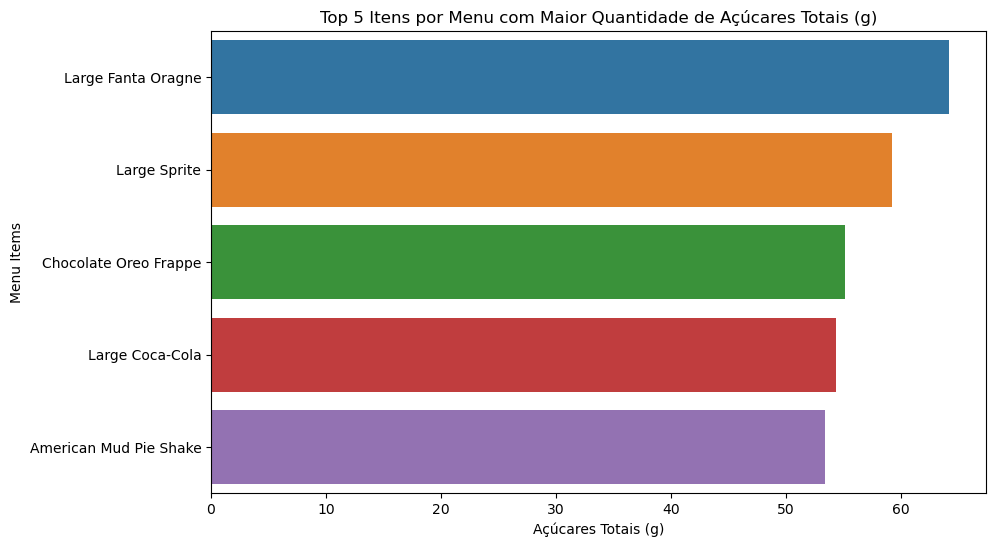

In [29]:
def encontrar_maiores_itens_acucar(data, n=5):

    data_ordenados_por_acucar = data.sort_values(by='Total Sugars (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_acucar.head(n)
    
    return top_n_itens[['Menu Items', 'Total Sugars (g)']]

cinco_maiores_itens_acucar = encontrar_maiores_itens_acucar(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sugars (g)', y='Menu Items', data=cinco_maiores_itens_acucar, errorbar=None)
plt.xlabel('Açúcares Totais (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Açúcares Totais (g)')
plt.show()

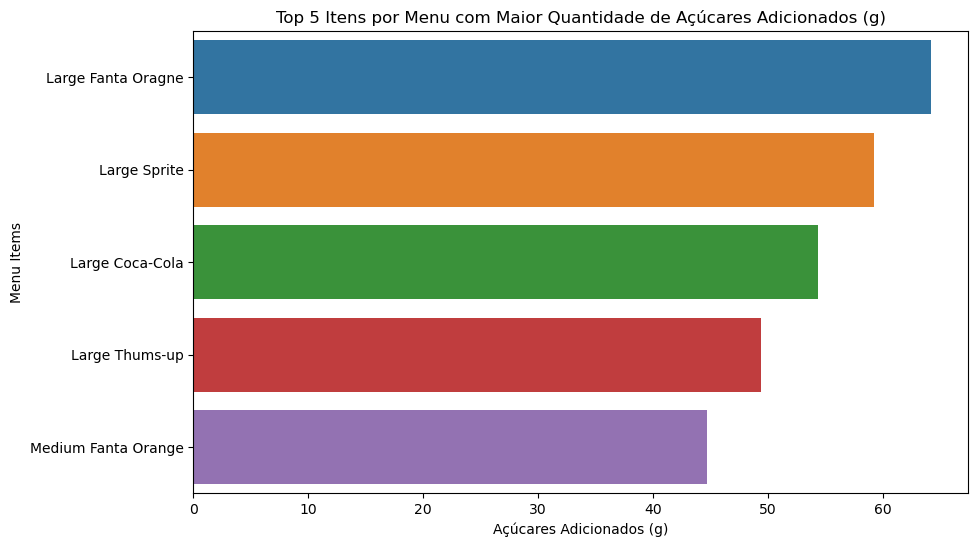

In [28]:
def encontrar_maiores_itens_acucar_adicionado(data, n=5):

    data_ordenados_por_acucar_adicionado = data.sort_values(by='Added Sugars (g)', ascending=False)
    
    top_n_itens = data_ordenados_por_acucar_adicionado.head(n)
    
    return top_n_itens[['Menu Items', 'Added Sugars (g)']]

cinco_maiores_itens_acucar_adicionado = encontrar_maiores_itens_acucar_adicionado(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Added Sugars (g)', y='Menu Items', data=cinco_maiores_itens_acucar_adicionado, errorbar=None)
plt.xlabel('Açúcares Adicionados (g)')
plt.ylabel('Menu Items')
plt.title('Top 5 Itens por Menu com Maior Quantidade de Açúcares Adicionados (g)')
plt.show()

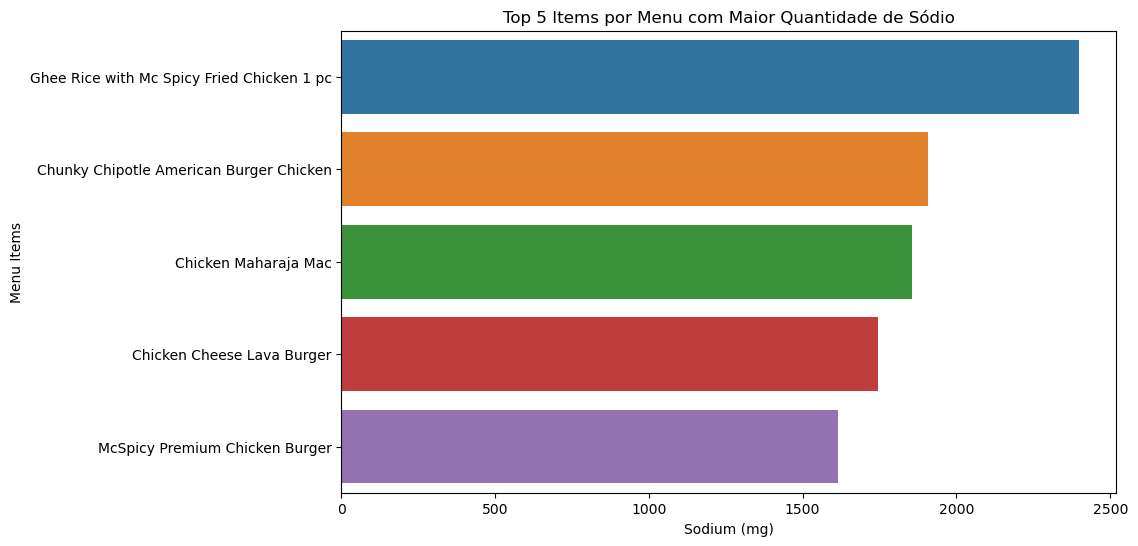

In [47]:
def encontrar_maiores_itens_sodio(data, n=5):

    data_ordenados_por_sodio = data.sort_values(by='Sodium (mg)', ascending=False)
    
    top_n_itens = data_ordenados_por_sodio.head(n)
    
    return top_n_itens[['Menu Items', 'Sodium (mg)']]

cinco_maiores_itens_sodio = encontrar_maiores_itens_sodio(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sodium (mg)', y='Menu Items', data=cinco_maiores_itens_sodio, errorbar=None)
plt.xlabel('Sodium (mg)')
plt.ylabel('Menu Items')
plt.title('Top 5 Items por Menu com Maior Quantidade de Sódio')
plt.show()

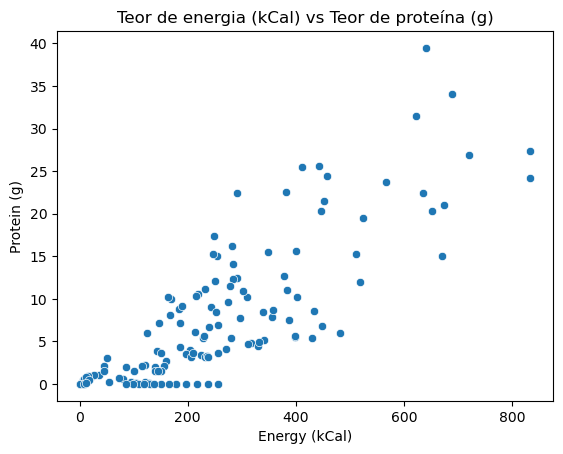

In [50]:
sns.scatterplot(x='Energy (kCal)', y='Protein (g)', data=data)
plt.title('Teor de energia (kCal) vs Teor de proteína (g)')
plt.show()

**3. Conclusão**

- McCafe possui a maior diversidade de itens, seguido por Regular e Gourmet.
- Itens mais calóricos estão nos menus Regular e Gourmet.
- Opções ricas em proteínas predominam no menu Gourmet.
- Gorduras Totais são comuns nos menus Regular e Gourmet, enquanto saturadas predominam no Gourmet e trans no Regular.
- Maior quantidade de colesterol  está nos itens do menu Gourmet.
- O carboidratos presentes em todas as categorias, destacando-se em Regular e Gourmet.
- Os açúcares mais comuns em bebidas, enfatizando escolhas conscientes nessa categoria.
- Conforme o teor de energia aumenta, o teor de proteína também tende a aumentar, e vice-versa.